# Exploring Dandiset 001433: Breathing rhythm and place dataset

**Disclaimer:** This notebook was AI-generated and has not been fully verified. Users should exercise caution when interpreting the code or results.

## Overview of Dandiset 001433

This Dandiset contains behavioral and electrophysiological data from recordings of sniffing, video, and olfactory bulb electrophysiology in freely-behaving mice.

**Dandiset Link:** https://dandiarchive.org/dandiset/001433/0.250507.2356

## Notebook Contents

This notebook demonstrates how to:

1. Access and load the Dandiset using the DANDI API.
2. Load a specific NWB file from the Dandiset.
3. Explore the contents and metadata of the NWB file.
4. Load and visualize a subset of the electrophysiology (LFP) and sniff signal data.

## Required Packages

To run this notebook, you will need the following Python packages:

* dandi
* pynwb
* h5py
* remfile
* numpy
* matplotlib
* itertools
* pandas (for exploring NWB tables)

## Loading the Dandiset

We can use the `dandiapi` client to connect to the DANDI archive and access the Dandiset.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme()

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001433", "0.250507.2356")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: Breathing rhythm and place dataset
Dandiset URL: https://dandiarchive.org/dandiset/001433/0.250507.2356

First 5 assets:
- sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb (ID: 63d19f03-2a35-48bd-a54f-9ab98ceb7be2)
- sub-4122/sub-4122_ses-20250507T152930_ecephys.nwb (ID: cce2f86c-2440-4358-8298-75cb2faa83f1)
- sub-4122/sub-4122_ses-20250507T152933_ecephys.nwb (ID: 154a5db2-9bad-48b9-bbe4-13376c315cbe)
- sub-4127/sub-4127_ses-20250507T152941_ecephys.nwb (ID: 8a2c176c-846d-432c-9c7b-cfd0cefa40cb)
- sub-4127/sub-4127_ses-20250507T152953_ecephys.nwb (ID: ba3b58b3-38ff-49d4-bc73-2105c87ecf49)


## Loading an NWB File

We will load one of the NWB files from the Dandiset to explore its contents. We will be using the file `sub-4122/sub-4122_ses-20250507T152927_ecephys.nwb`.

The URL for this asset is: `https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/`

In [2]:
# Load the NWB file

url = "https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Show some basic metadata from the NWB file
print(f"Session description: {nwb.session_description}")
print(f"Identifier: {nwb.identifier}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

Session description: LFP and sniff recording
Identifier: 4122_4
Session start time: 2025-05-07 15:29:27.359523-07:00
Experimenter: ('Rafilson, Sidney',)


/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## NWB File Contents

This NWB file contains electrophysiology (LFP) and sniff signal data, along with related metadata.

Here is a summary of some key contents:

*   **acquisition**: Contains acquired data streams.
   *   `LFP`: ElectricalSeries object for LFP data.
       *   `data`: shape (1969184, 16), dtype float64 - LFP signal data.
       *   `rate`: 1000.0 - Sampling rate.
       *   `unit`: 'volts' - Unit of measurement.
   *   `SniffSignal`: TimeSeries object for sniff signal data.
       *   `data`: shape (1969184,), dtype float64 - Sniff signal data.
       *   `rate`: 1000.0 - Sampling rate.
       *   `unit`: 'volts' - Unit of measurement.
*   **processing**: Contains processed data.
   *   `behavior`: ProcessingModule for behavioral data.
       *   `data_interfaces`:
           *   `exhalation_time`: TimeSeries - Exhalation times.
           *   `inhalation_time`: TimeSeries - Inhalation times.
*   **electrodes**: DynamicTable - Metadata about the electrodes.
   *   `location`: Location of the electrodes (e.g., brain region).
   *   `group`: Electrode group reference.
   *   `group_name`: Name of the electrode group.
   *   `filtering`: Description of hardware filtering.
*   **electrode_groups**: LabelledDict - Information about electrode groups.
*   **devices**: LabelledDict - Information about recording devices.
*   **subject**: Subject object - Metadata about the experimental subject.

**Explore this NWB file on Neurosift:** https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/63d19f03-2a35-48bd-a54f-9ab98ceb7be2/download/&dandisetId=001433&dandisetVersion=0.250507.2356

## Visualizing LFP and Sniff Signal Data

We will now load and plot a small subset of the LFP and Sniff Signal data to visualize the signals. We will plot the first 10 seconds of data from the first LFP channel and the Sniff Signal.

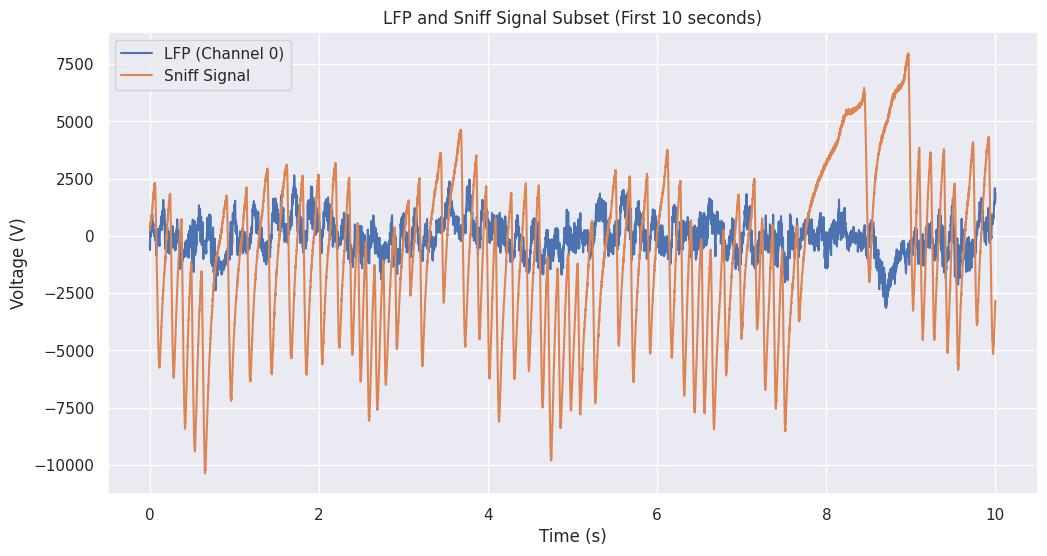

In [3]:
# Access LFP and SniffSignal data
lfp_data = nwb.acquisition["LFP"].data
sniff_data = nwb.acquisition["SniffSignal"].data
lfp_starting_time = nwb.acquisition["LFP"].starting_time
lfp_rate = nwb.acquisition["LFP"].rate

# Load a small portion of data for plotting (first 10 seconds)
num_points_to_plot = int(10 * lfp_rate) # 10 seconds
lfp_subset = lfp_data[0:num_points_to_plot, 0] # First channel of LFP
sniff_subset = sniff_data[0:num_points_to_plot]
timestamps_subset = lfp_starting_time + (1/lfp_rate) * np.arange(num_points_to_plot)

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(timestamps_subset, lfp_subset, label="LFP (Channel 0)")
plt.plot(timestamps_subset, sniff_subset, label="Sniff Signal")
plt.xlabel("Time (s)")
plt.ylabel("Voltage (V)")
plt.title("LFP and Sniff Signal Subset (First 10 seconds)")
plt.legend()
plt.show()

## Exploring Electrode Metadata

The NWB file also contains metadata about the electrodes used for the LFP recording. We can load this information into a pandas DataFrame for easier viewing.

In [4]:
electrodes_df = nwb.electrodes.to_dataframe()
electrodes_df

,location,group,group_name,filtering
id,,,,
0,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
1,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
2,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
3,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
4,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
5,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
6,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
7,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none
8,olfactory bulb,LFPGroup pynwb.ecephys.ElectrodeGroup at 0x126...,LFPGroup,none


## Summary and Future Directions

This notebook provided a basic introduction to accessing and exploring data from Dandiset 001433, specifically focusing on the LFP and Sniff Signal data within one of the NWB files. We demonstrated how to load the Dandiset and NWB files, inspect their contents, and visualize subsets of the time-series data.

Possible future directions for analysis include:

*   Analyzing the relationship between sniffing behavior and LFP activity in more detail.
*   Exploring the exhalation and inhalation time data in the `processing/behavior` module.
*   Investigating the metadata of the different electrode channels.
*   Analyzing data from other NWB files in the Dandiset.
*   Utilizing the video data available in the Dandiset (though not covered in this notebook).

In [5]:
# Close the NWB file
io.close()